# Walking Speed Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv("ms_data_w_insurance.csv")

### 1-1. Scatter plot of Age v.s. Walking Speed

<Figure size 1000x600 with 0 Axes>

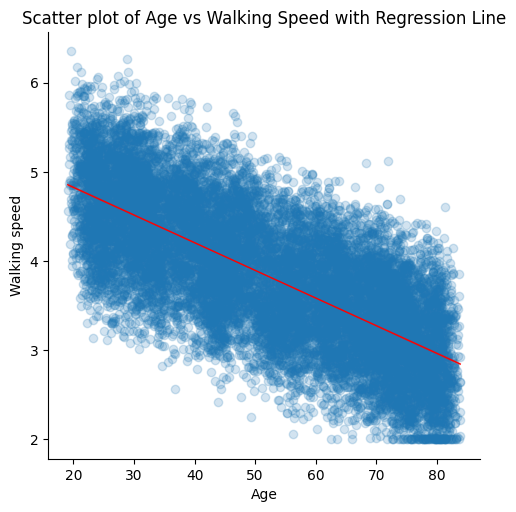

In [2]:
plt.figure(figsize=(10,6))
sns.lmplot(x="age", y="walking_speed", data=data, line_kws = {'color': 'red', 'linewidth' : 1}, scatter_kws={'alpha':0.2})
plt.title("Scatter plot of Age vs Walking Speed with Regression Line")
plt.xlabel("Age")
plt.ylabel("Walking speed")
plt.show()

### 1-2. Box plot for Walking Speed by Education Levels

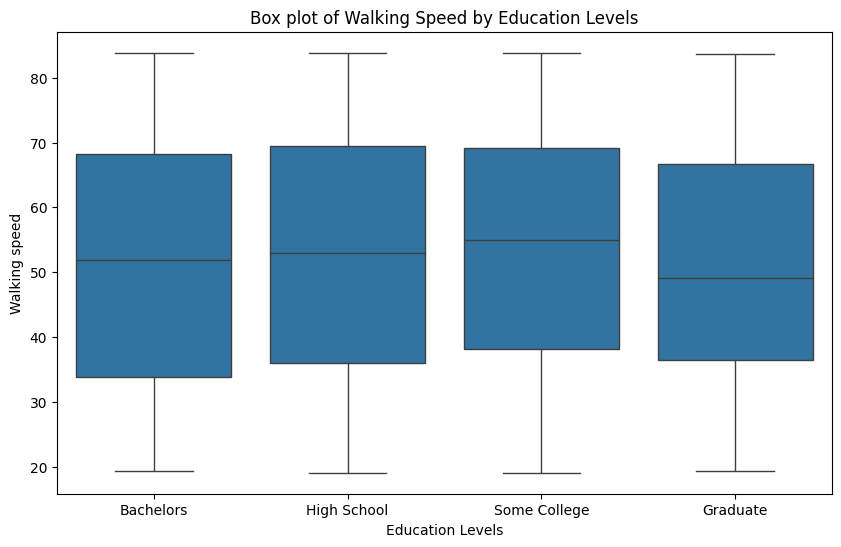

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(x="education_level", y="age", data=data)
plt.title("Box plot of Walking Speed by Education Levels")
plt.xlabel("Education Levels")
plt.ylabel("Walking speed")
plt.show()

### 1-3. Line Plot showing Education & Age Interaction

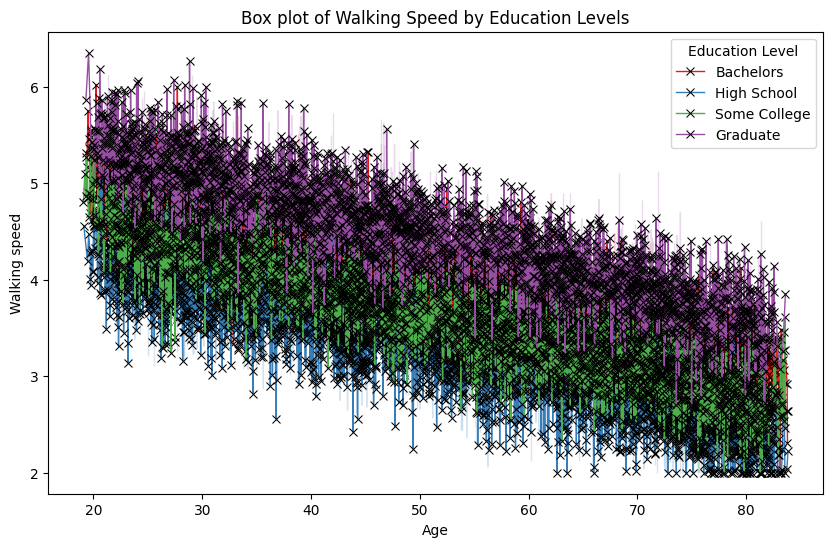

In [4]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age", y="walking_speed", hue = "education_level", data=data, palette="Set1", marker= "x", markeredgecolor='black', linewidth = 1)
plt.title("Box plot of Walking Speed by Education Levels")
plt.xlabel("Age")
plt.ylabel("Walking speed")
plt.legend(title = "Education Level")
plt.show()

# Cost Analysis

### 2-1. Bar plot of mean costs by insurance type (with error bars/confidence intervals)

/var/folders/t8/4nh9lkn90_j8336dnbb9r13w0000gn/T/ipykernel_85080/124044625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "insurance_type", y = "visit_cost", data = data, palette = "Set1", errorbar = "sd", capsize = 0.2, order = ["Basic", "Premium", "Platinum"])


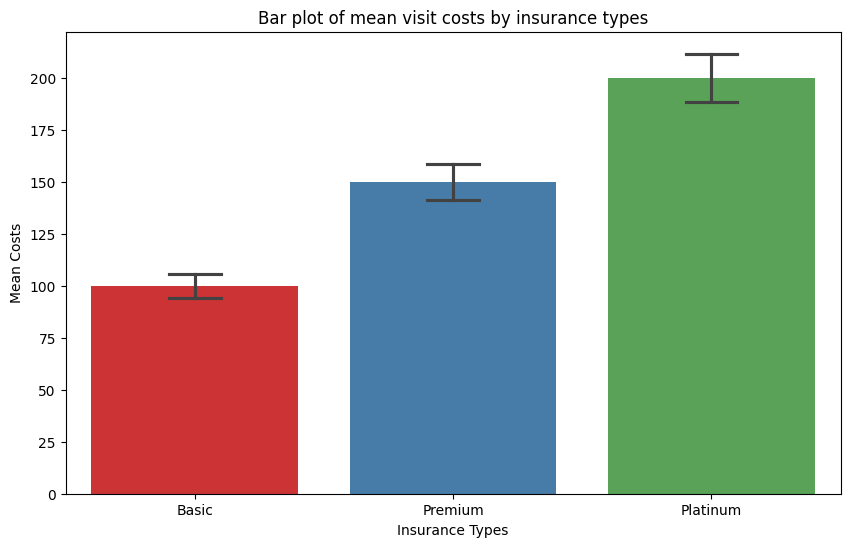

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x = "insurance_type", y = "visit_cost", data = data, palette = "Set1", errorbar = "sd", capsize = 0.2, order = ["Basic", "Premium", "Platinum"])
plt.title("Bar plot of mean visit costs by insurance types")
plt.xlabel("Insurance Types")
plt.ylabel("Mean Costs")
plt.show()

### 2-2. Box plots showing cost distributions (with error bars/confidence intervals)


/var/folders/t8/4nh9lkn90_j8336dnbb9r13w0000gn/T/ipykernel_85080/1026863449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "insurance_type", y = "visit_cost", data = data, order = ["Basic", "Premium", "Platinum"], palette = "Set2")


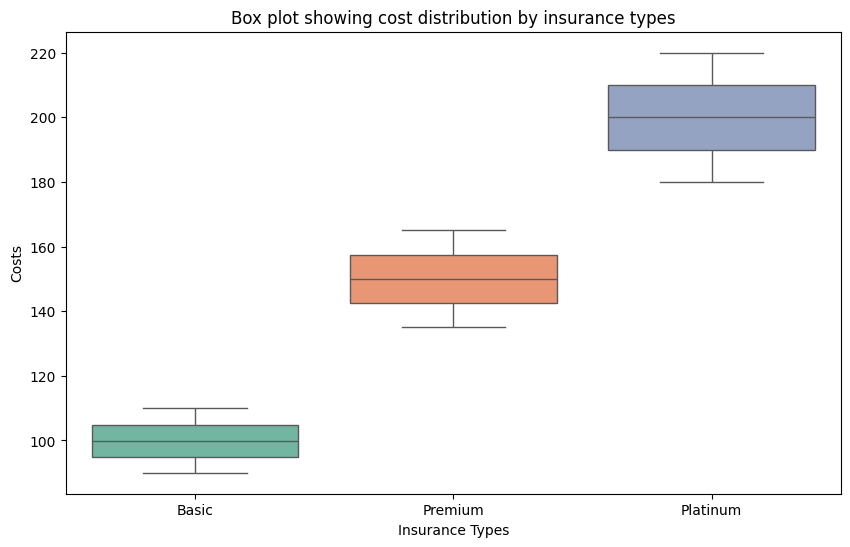

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "insurance_type", y = "visit_cost", data = data, order = ["Basic", "Premium", "Platinum"], palette = "Set2")
plt.title("Box plot showing cost distribution by insurance types")
plt.xlabel("Insurance Types")
plt.ylabel("Costs")
plt.show()

# Combined visualizations

### 3-1. Pair plot of key variables

<Figure size 1000x600 with 0 Axes>

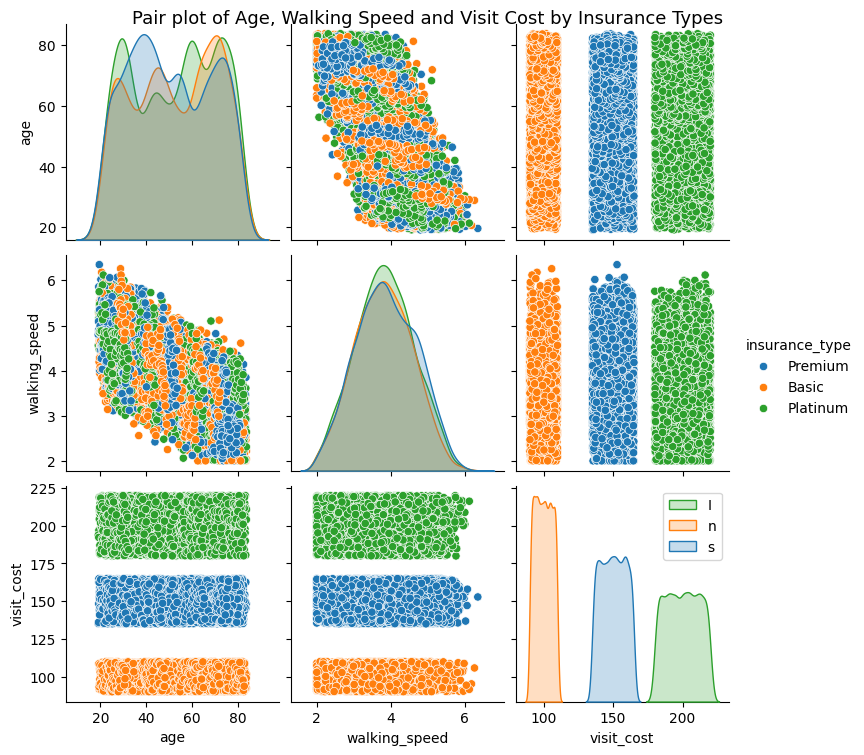

In [7]:
plt.figure(figsize=(10,6))
sns.pairplot(vars = ["age", "walking_speed", "visit_cost"],  hue = "insurance_type", data=data)
plt.suptitle("Pair plot of Age, Walking Speed and Visit Cost by Insurance Types", y=1.00, fontsize=13)
plt.legend("Insurance Types")
plt.show()

### 3-2. Faceted plots by education/insurance

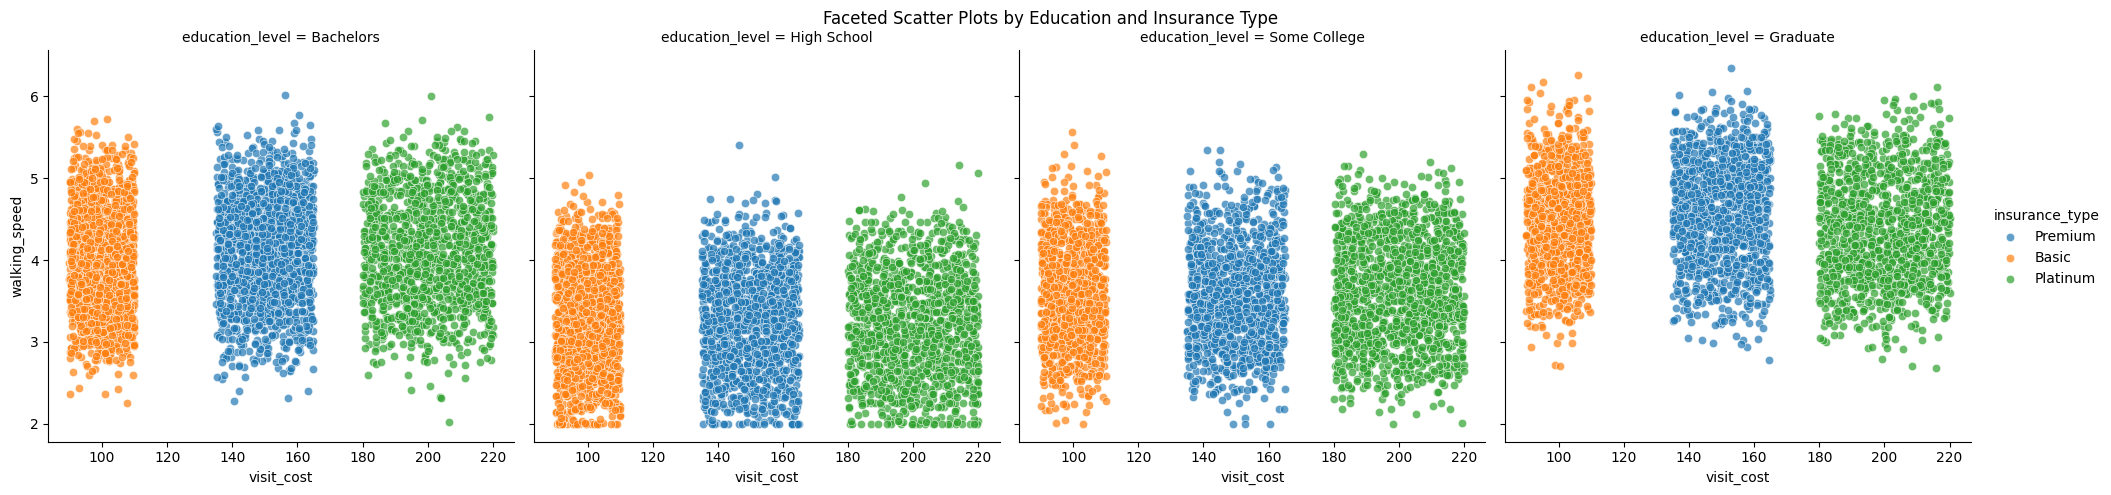

In [8]:
grid = sns.FacetGrid(data=data, col="education_level", hue="insurance_type", height=5, aspect=1)
grid.map(sns.scatterplot, "visit_cost", "walking_speed", alpha=0.7)
grid.add_legend()
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle("Faceted Scatter Plots by Education and Insurance Type")
plt.show()

### 3-3. Time Trend Graph

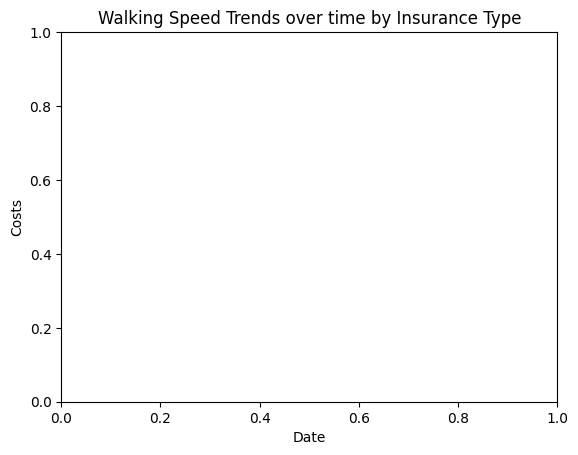

In [12]:
data["visit_date"] = pd.to_datetime(data["visit_date"])
grouped = data.groupby(["visit_date", "insurance_type"], as_index=False)["visit_cost"].mean()

fig = px.line(grouped, x = "visit_date", y = "visit_cost", color = "insurance_type")
plt.title("Walking Speed Trends over time by Insurance Type")
plt.xlabel("Date")
plt.ylabel("Costs")
fig.show()